In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [3]:
import anndata

In [4]:
adata = anndata.read_h5ad('../data/kmers_adata_CTCF_k20.h5ad')

In [5]:
def get_dataset(adata, tf):
    data_tf = adata[(adata.obs['tf.name'] == tf)]  # & (grp['cycle'].astype(str) == '1')]
    data_zero = adata[(adata.obs['cycle'] == 0) & adata.obs['library'].isin(set(adata.obs[adata.obs['tf.name'] == tf]['library']))]
    return (data_tf, data_zero)

In [6]:
data_tf, data_zero = get_dataset(adata, 'CTCF')

# order cycles
assert np.all(data_tf.obs.cycle == np.arange(1, data_tf.shape[0] + 1))
# only one accession number
assert len(set(data_tf.obs.accession)) == 1

data = [data_zero.to_df().head(1).T.merge(data_tf.to_df().T, left_index=True, right_index=True)]

In [7]:
data = data[0]

In [8]:
# data = df.head(1000)
data = data.sample(n=5000)
# data = df.copy()

In [9]:
n_rounds = 4
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

AttributeError: Can only use .str accessor with string values!

In [ ]:
set(data[0])

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [32]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, store_rev=False)
train = tdata.DataLoader(dataset=dataset, batch_size=64, shuffle=True)

loading object (# entries) 5000


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import numpy as np



##NEW JOB
ignore kernel 1
# rounds 1
# batches 1
# enr_series True
next w 16 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0


before kernel optimization.


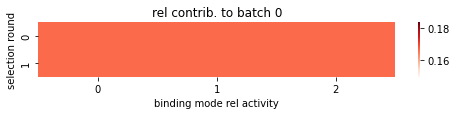


#activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


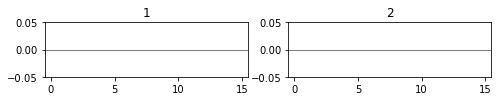

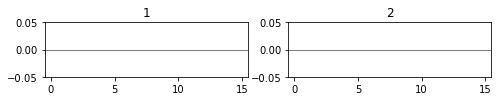

kernels mask [0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 100
lr= 0.01, weight_decay= 0.01, dir weight= 1e-06
Epoch: 101, Loss: 0.842012 , best epoch: 24 secs per epoch: 0.658 s
Epoch: 125, Loss: 0.8418 , best epoch: 24 secs per epoch: 0.655 s
early stop!
total time: 81.227 s
secs per epoch: 0.655 s

##After kernel opt / before shift optim.


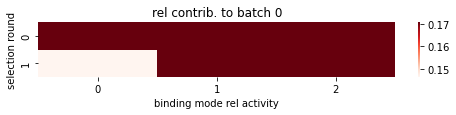


#activities
[[[1.0000272 0.85842  ]
  [1.        1.       ]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.1527, -0.1527]], device='cuda:0', requires_grad=True)


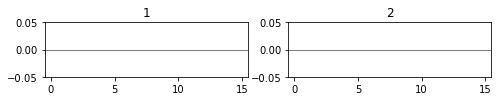

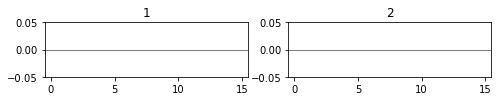

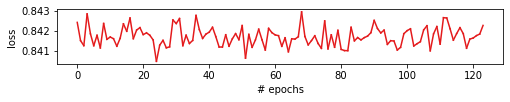

after shift optimz model


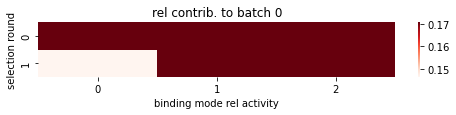


#activities
[[[1.0000272 0.85842  ]
  [1.        1.       ]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.1527, -0.1527]], device='cuda:0', requires_grad=True)


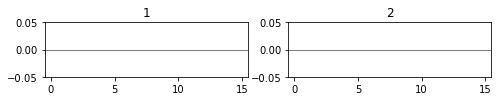

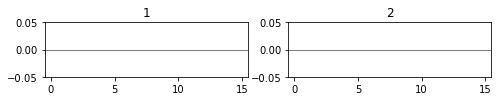

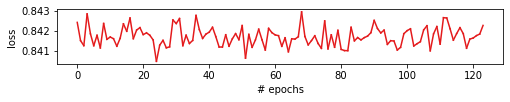



Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
setting grad status of kernel at 2 to 0


before kernel optimization.


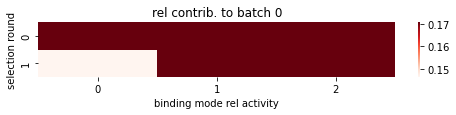


#activities
[[[1.0000272 0.85842  ]
  [1.        1.       ]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.1527, -0.1527]], device='cuda:0', requires_grad=True)


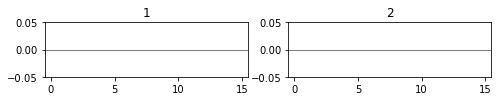

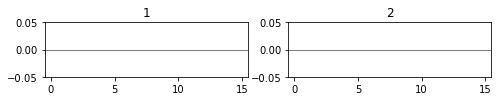

kernels mask [0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 100
lr= 0.001, weight_decay= 0.001, dir weight= 1e-06
Epoch: 101, Loss: 0.840002 , best epoch: 91 secs per epoch: 0.898 s
Epoch: 201, Loss: 0.840844 , best epoch: 143 secs per epoch: 0.900 s
Epoch: 301, Loss: 0.839653 , best epoch: 299 secs per epoch: 0.901 s
Epoch: 401, Loss: 0.835854 , best epoch: 377 secs per epoch: 0.894 s
Epoch: 501, Loss: 0.835166 , best epoch: 487 secs per epoch: 0.893 s
Epoch: 601, Loss: 0.832297 , best epoch: 596 secs per epoch: 0.894 s
Epoch: 701, Loss: 0.831060 , best epoch: 690 secs per epoch: 0.894 s


In [ ]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 1e-6
# for dirichlet_regularization_log in range(-5, 3):

n_epochs = 1000
log_each = 100
n_kernels = 3

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

import time
t0 = time.time()

ignore_kernel = 1 # [0, 1]:

print('\n\n##NEW JOB')
print('ignore kernel', ignore_kernel)
model_by_k, res_next = mb.tl.train_iterative(train, device, w=16, show_logo=True, opt_kernel_shift=True, # opt_kernel_length=True,
                                             dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                             lr=[0.01, 0.001, 0.001, 0.001], weight_decay=[0.01, 0.001, 0.001, 0.001], ignore_kernel=ignore_kernel,
                                             num_epochs=n_epochs, early_stopping=100, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                             n_kernels=n_kernels, log_each=log_each, stop_at_kernel=None) #  seed=seed) # seeds.index[0]) # 
print('##DONE....\n\n')

    
print('total time: %.3f s' % ((time.time() - t0)))    
# res = []
# model_by_k = {}
